### Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")

### Initializing the dataset

In [40]:
df = pd.read_csv('boston_crime.csv', encoding= 'unicode_escape')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2020,4,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2020,4,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2020,4,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2020,4,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2020,4,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### Looking for Null values

In [41]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

### Working with the subset of the dataset

In [42]:
df['YEAR'].unique()
df = df.loc[df['YEAR'].isin([2018, 2019])]
df = df.loc[df['UCR_PART'] == 'Part One']
df.shape

(37538, 16)

### Converting 'Day of Week' column to categorical data

In [43]:
df['DAY_OF_WEEK'] = pd.Categorical(df['DAY_OF_WEEK'], 
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                   ordered=True)
df.dtypes

INCIDENT_NUMBER          object
OFFENSE_CODE              int64
OFFENSE_CODE_GROUP       object
OFFENSE_DESCRIPTION      object
DISTRICT                 object
REPORTING_AREA           object
SHOOTING                 object
YEAR                      int64
MONTH                     int64
DAY_OF_WEEK            category
HOUR                      int64
UCR_PART                 object
STREET                   object
Lat                     float64
Long                    float64
Location                 object
dtype: object

### Dropping first two columns

In [44]:
df.drop(columns=['INCIDENT_NUMBER', 'OFFENSE_CODE'], inplace=True)
df.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2019,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
5919,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,NaN,2019,3,Wednesday,9,Part One,AUSTIN ST,42.257688,-71.126418,"(42.25768764, -71.12641770)"
6940,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,NaN,2019,3,Thursday,12,Part One,COMMONWEALTH AVE,42.338363,-71.154410,"(42.33836272, -71.15441001)"
12370,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E13,571,NaN,2019,11,Tuesday,21,Part One,SYLVIA ST,42.310559,-71.102854,"(42.31055889, -71.10285400)"
14227,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2019,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"


### Visualize the crime on Boston

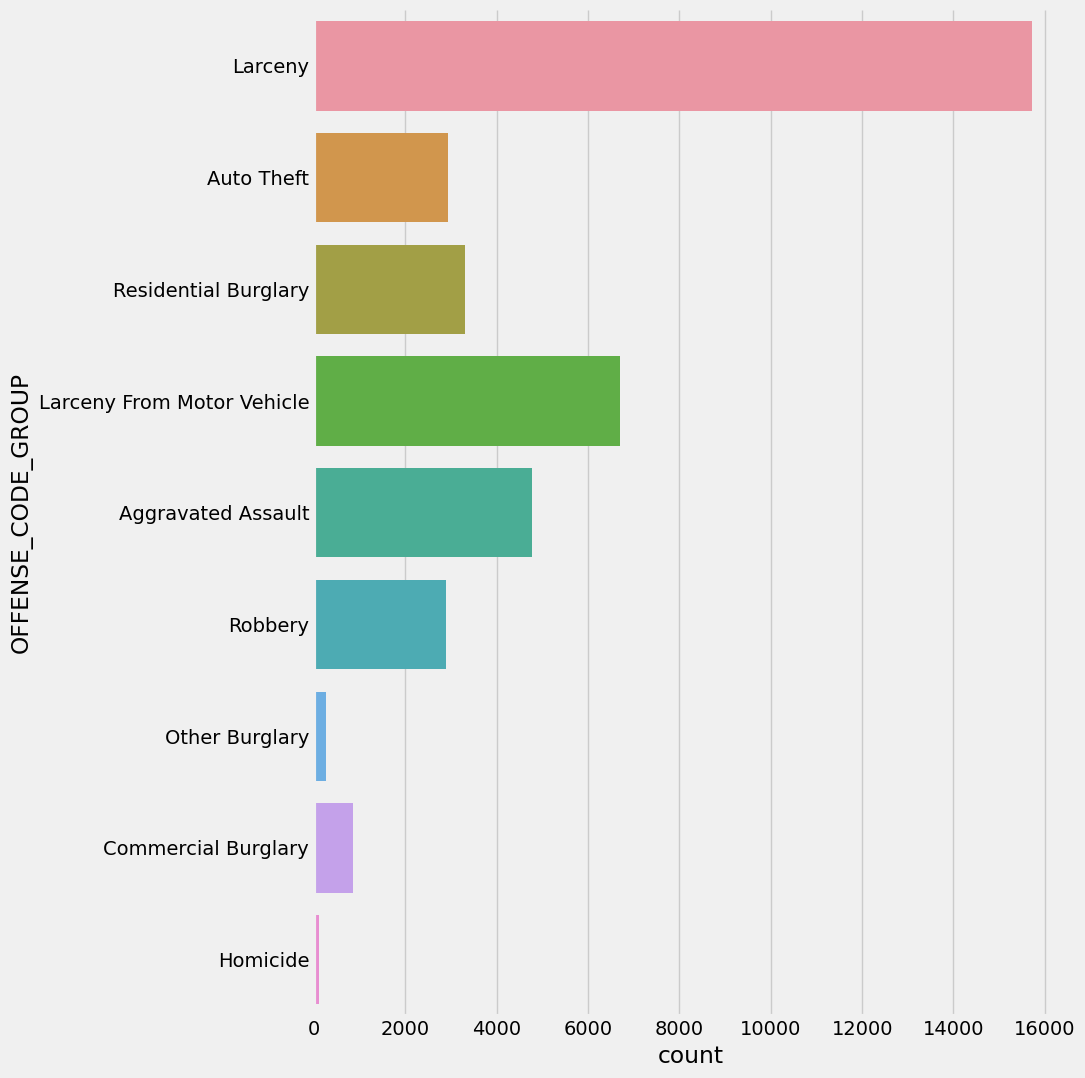

In [54]:
sns.catplot(data=df, y='OFFENSE_CODE_GROUP', kind='count', 
            height=11, aspect=1.0, order=df['OFFENSE_CODE_GROUP'].unique())
plt.show()

Larceny (theft) is the most occuring crime in the city of Boston whilst Homicide is the least occuring crime.

### Occurance of Crime by Hour

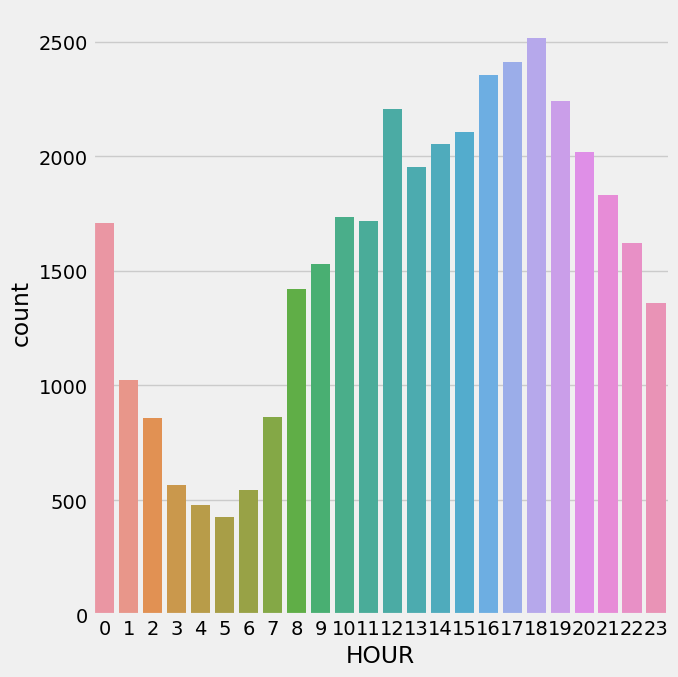

In [58]:
sns.catplot(data=df, x='HOUR', kind='count', 
            height=7, aspect=1.0)
plt.show()

From around midday to midnight, the crime rate is high. And the crime rate is at its peak at around 4 pm to 7 pm.

### Occurance of Crime by Day of the Week

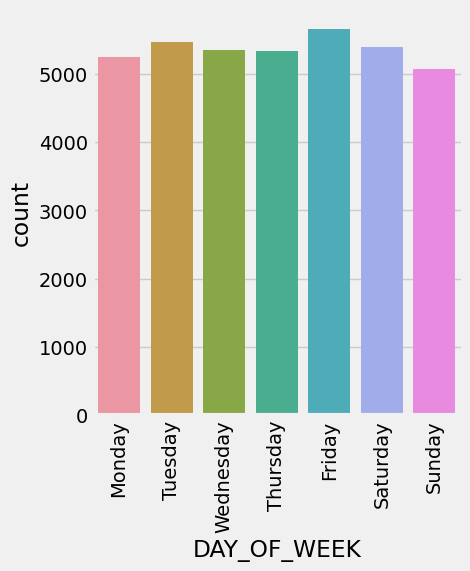

In [60]:
sns.catplot(data=df, x='DAY_OF_WEEK', kind='count', 
            height=5, aspect=1.0)
plt.xticks(rotation=90)
plt.show()

Crime rate is similar throughout the week but it is comparatively higher during Fridays.